# 2. Reproduce the original model

In [80]:
import pandas as pd
import numpy as np
import os

analysis_dir = os.getcwd()
assert analysis_dir.endswith(os.path.join('em-2020','analysis'))
plot_dir = os.path.realpath(os.path.join(analysis_dir, '..', 'tex', 'plots'))
data_dir = os.path.realpath(os.path.join(analysis_dir, '..', 'data'))

In [81]:
suppressMessages({
library(lavaan)
library(semPlot)
library(semTools)
library(MVN)
library(Hmisc)
})

In [82]:
data.raw <- read.csv('../data/WB_BGD_201805.csv')
data <- subset(data.raw, year >= 1986 & year <= 2015)
head(data)

data.log <- cbind(data.raw['year'], log(subset(data.raw, select=-year)))
data.log <- subset(data.log, year >= 1986 & year <= 2015)
head(data.log)


# data.logdiff <- diff(as.matrix(log(data.raw)))
data.logdiff <- cbind(data.raw[-1,'year', drop=FALSE], diff(as.matrix(log(subset(data.raw, select=-year)))))
data.logdiff <- subset(data.logdiff, year >= 1986 & year <= 2015)
head(data.logdiff)


,year,ISG,TO,P_GDP,EI,TI
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
27,1986,20.83050,17.01874,227.4230,0.4893292,93
28,1987,20.05066,16.68780,247.0723,0.4316770,121
29,1988,20.41723,17.67806,263.2228,0.4336869,133
30,1989,20.28788,18.32517,277.8178,0.4204187,108
31,1990,20.69696,18.96650,297.5680,0.4031165,108
32,1991,21.73820,18.88983,284.7256,0.4055741,113


,year,ISG,TO,P_GDP,EI,TI
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
27,1986,3.036418,2.834315,5.426812,-0.7147197,4.532599
28,1987,2.998262,2.814678,5.509681,-0.8400777,4.795791
29,1988,3.016379,2.872325,5.573001,-0.8354325,4.890349
30,1989,3.010024,2.908276,5.626966,-0.8665041,4.682131
31,1990,3.029987,2.942674,5.695643,-0.9085296,4.682131
32,1991,3.079071,2.938624,5.651526,-0.9024517,4.727388


,year,ISG,TO,P_GDP,EI,TI
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
27,1986,0.001931049,-0.068324550,-0.04981581,0.091231674,-0.38005539
28,1987,-0.038156253,-0.019637466,0.08286922,-0.125357979,0.26319105
29,1988,0.018117113,0.057646795,0.06331973,0.004645233,0.09455858
30,1989,-0.006355320,0.035951178,0.05396486,-0.031071599,-0.20821790
31,1990,0.019963260,0.034398627,0.06867711,-0.042025491,0.00000000
32,1991,0.049084326,-0.004050854,-0.04411684,0.006077858,0.04525659


In [83]:
summary(data)
order = c('ISG', 'TO', 'TI', 'P_GDP', 'EI')
cor(data, use='pairwise')[order, order]

      year           ISG              TO            P_GDP       
 Min.   :1986   Min.   :20.05   Min.   :16.69   Min.   : 227.4  
 1st Qu.:1993   1st Qu.:22.86   1st Qu.:22.93   1st Qu.: 293.2  
 Median :2000   Median :23.92   Median :28.30   Median : 401.6  
 Mean   :2000   Mean   :24.07   Mean   :30.56   Mean   : 498.8  
 3rd Qu.:2008   3rd Qu.:25.90   3rd Qu.:39.48   3rd Qu.: 597.1  
 Max.   :2015   Max.   :28.15   Max.   :48.11   Max.   :1210.2  
                                                                
       EI               TI       
 Min.   :0.2049   Min.   : 93.0  
 1st Qu.:0.3205   1st Qu.:138.0  
 Median :0.3463   Median :291.0  
 Mean   :0.3513   Mean   :239.2  
 3rd Qu.:0.4179   3rd Qu.:317.5  
 Max.   :0.4893   Max.   :354.0  
 NA's   :1                       

,ISG,TO,TI,P_GDP,EI
ISG,1.0000000,0.9327355,0.7972720,0.8715645,-0.8552086
TO,0.9327355,1.0000000,0.8417575,0.8757430,-0.9187085
TI,0.7972720,0.8417575,1.0000000,0.6928933,-0.7820815
P_GDP,0.8715645,0.8757430,0.6928933,1.0000000,-0.9492223
EI,-0.8552086,-0.9187085,-0.7820815,-0.9492223,1.0000000


In [84]:
summary(lm('TI ~ ISG', data=data.log))


Call:
lm(formula = "TI ~ ISG", data = data.log)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.68860 -0.15671  0.02306  0.12760  0.48305 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6.9097     1.7183  -4.021 0.000397 ***
ISG           3.8706     0.5407   7.158 8.64e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2792 on 28 degrees of freedom
Multiple R-squared:  0.6466,	Adjusted R-squared:  0.634 
F-statistic: 51.24 on 1 and 28 DF,  p-value: 8.642e-08


In [85]:
summary(lm('P_GDP ~ TO', data=data.log))


Call:
lm(formula = "P_GDP ~ TO", data = data.log)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29925 -0.12188  0.00087  0.11016  0.52068 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.79647    0.33615   5.344 1.08e-05 ***
TO           1.27854    0.09938  12.865 2.83e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1797 on 28 degrees of freedom
Multiple R-squared:  0.8553,	Adjusted R-squared:  0.8501 
F-statistic: 165.5 on 1 and 28 DF,  p-value: 2.834e-13


In [86]:
summary(lm('EI ~ ISG + TO + TI + P_GDP', data=data.log))


Call:
lm(formula = "EI ~ ISG + TO + TI + P_GDP", data = data.log)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05058 -0.01766  0.00164  0.01890  0.05243 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.38449    0.43939   3.151  0.00432 ** 
ISG          0.30369    0.18454   1.646  0.11287    
TO           0.05433    0.07902   0.688  0.49834    
TI           0.03439    0.02427   1.417  0.16945    
P_GDP       -0.62350    0.03685 -16.919 7.68e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02855 on 24 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9852,	Adjusted R-squared:  0.9827 
F-statistic: 399.2 on 4 and 24 DF,  p-value: < 2.2e-16


In [94]:
model.path <- '
## path model
EI ~ p_ei_isg*ISG + p_ei_to*TO + p_ei_ti*TI + p_ei_pgdp*P_GDP
TI ~ p_ti_isg*ISG
P_GDP ~ p_pgdp_to*TO
## indirect effect
p_ei_ti_isg := p_ei_ti*p_ti_isg
p_ei_pgdp_to := p_ei_pgdp*p_pgdp_to
## total effect
p_ei_isg_total := p_ei_isg + (p_ei_ti*p_ti_isg)
p_ei_to_total := p_ei_to + (p_ei_pgdp*p_pgdp_to)
'

capture <- function(expr, file) {
    writeLines(c('\\begin{verbatim}', 
                 capture.output(expr),
                 '\\end{verbatim}'), con=file)
}
model.path.fit <- sem(model.path, data=data.log, estimator='ML', missing='FIML', meanstructure=TRUE)
capture(summary(model.path.fit, standardized=TRUE, header=TRUE,  fit.measures=TRUE, estimates=FALSE),
        '../tex/plots/model.path.fit.summary.tex')
capture(summary(model.path.fit, standardized=TRUE, header=FALSE, estimates=TRUE),
        '../tex/plots/model.path.fit.estimates.tex')
summary(model.path.fit, standardized=TRUE, fit.measures=TRUE)

Warning message in lav_model_hessian(lavmodel = lavmodel, lavsamplestats = lavsamplestats, :
“lavaan WARNING: Hessian is not fully symmetric. Max diff = 1.06448313451218e-05”


lavaan 0.6-5 ended normally after 64 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         12
                                                      
  Number of observations                            30
  Number of missing patterns                         2
                                                      
Model Test User Model:
                                                      
  Test statistic                                14.849
  Degrees of freedom                                 3
  P-value (Chi-square)                           0.002

Model Test Baseline Model:

  Test statistic                               226.218
  Degrees of freedom                                 9
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.945
  Tucker-Lewis Index (TLI)            

In [89]:
soln.std.all <- as.data.frame(standardizedSolution(model.path.fit, se=TRUE, type='std.all', remove.def=FALSE))
soln.std.lv <- as.data.frame(standardizedSolution(model.path.fit, se=TRUE, type='std.lv', remove.def=FALSE))
r.square <- lavInspect(model.path.fit, 'rsquare')

In [90]:
%get soln.std.all --from R
%get soln.std.lv --from R
%get r.square --from R
display(soln_std_lv)
display(r_square)

Variable soln.std.all is put to SoS as soln_std_all
Variable soln.std.lv is put to SoS as soln_std_lv
Variable r.square is put to SoS as r_square


,lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
0,EI,~,ISG,0.303690,0.180305,1.684311,9.212154e-02,-0.049702,0.657082
1,EI,~,TO,0.054326,0.061142,0.888528,3.742569e-01,-0.065509,0.174162
2,EI,~,TI,0.034388,0.017734,1.939093,5.249003e-02,-0.000370,0.069146
3,EI,~,P_GDP,-0.623498,0.033243,-18.756055,0.000000e+00,-0.688653,-0.558344
4,TI,~,ISG,3.995115,0.555491,7.192043,6.383782e-13,2.906372,5.083857
5,P_GDP,~,TO,1.214148,0.082086,14.791255,0.000000e+00,1.053263,1.375033
6,EI,~~,EI,0.000675,0.000177,3.807887,1.401595e-04,0.000327,0.001022
7,TI,~~,TI,0.073967,0.019425,3.807887,1.401595e-04,0.035895,0.112038
8,P_GDP,~~,P_GDP,0.021051,0.005528,3.807887,1.401595e-04,0.010216,0.031885
9,ISG,~~,ISG,0.008266,0.000000,NaN,NaN,0.008266,0.008266


EI       0.985405
TI       0.640758
P_GDP    0.882961
dtype: float64

In [91]:
df = soln_std_all.query('(lhs != rhs) & (op == "~")').copy()
df = pd.merge(soln_std_all, soln_std_lv, 
              left_on=['lhs', 'op', 'rhs'], right_on=['lhs', 'op', 'rhs'], suffixes=['', '.LV'])
df.index = np.where(df.op == '~', df.lhs.str.cat([df.op, df.rhs], sep=' '), df.lhs)
df = df.loc[['TI ~ ISG', 'P_GDP ~ TO', 'EI ~ ISG', 'EI ~ TO', 'EI ~ TI', 'EI ~ P_GDP']]
df['Equation'] = ['1', '2', '3', '', '', '']
# df['Dep. var.'] = df.lhs.str.replace('P_GDP', r'P\_GDP')
# df['Ind. var.'] = df.rhs.str.replace('P_GDP', r'P\_GDP')
df['Coefficient'] = ('$P_{' + df.lhs + ',' + df.rhs + '}$').str.replace('P_GDP', r'P\_GDP')
df['Est.'] = np.round(df['est.std.LV'],3)
df['Est. (std.)'] = np.round(df['est.std'],3)
df['S.E. (std.)'] = np.round(df['se'],3)
df['p-value'] = ['{:.3f}'.format(x) if x > 0.01 else '*' for x in df['pvalue']]
df['$R^{2}$'] = ''
df['$R^{2}$'].iloc[0:3] = ['{:.3f}'.format(x) for x in r_square.loc[['TI', 'P_GDP', 'EI']]]
display(df)
df = df[['Equation', 
#         'Dep. var.', 'Ind. var.', 
         'Coefficient', 'Est.', 'Est. (std.)', 'S.E. (std.)', 'p-value', '$R^{2}$']]
display(df)
print(df.to_latex(escape=False, index=False))

/home/drake/.virtualenvs/jupyter/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper,est.std.LV,se.LV,z.LV,pvalue.LV,ci.lower.LV,ci.upper.LV,Equation,Coefficient,Est.,Est. (std.),S.E. (std.),p-value,$R^{2}$
TI ~ ISG,TI,~,ISG,0.800473,0.054995,14.555435,0.000000,0.692686,0.908261,3.995115,0.555491,7.192043,6.383782e-13,2.906372,5.083857,1,"$P_{TI,ISG}$",3.995,0.800,0.055,*,0.641
P_GDP ~ TO,P_GDP,~,TO,0.939660,0.016242,57.852363,0.000000,0.907826,0.971495,1.214148,0.082086,14.791255,0.000000e+00,1.053263,1.375033,2,"$P_{P\_GDP,TO}$",1.214,0.940,0.016,*,0.883
EI ~ ISG,EI,~,ISG,0.128424,0.076784,1.672538,0.094418,-0.022070,0.278918,0.303690,0.180305,1.684311,9.212154e-02,-0.049702,0.657082,3,"$P_{EI,ISG}$",0.304,0.128,0.077,0.094,0.985
EI ~ TO,EI,~,TO,0.082937,0.093525,0.886786,0.375194,-0.100369,0.266243,0.054326,0.061142,0.888528,3.742569e-01,-0.065509,0.174162,,"$P_{EI,TO}$",0.054,0.083,0.094,0.375,
EI ~ TI,EI,~,TI,0.072578,0.038560,1.882223,0.059806,-0.002998,0.148153,0.034388,0.017734,1.939093,5.249003e-02,-0.000370,0.069146,,"$P_{EI,TI}$",0.034,0.073,0.039,0.060,
EI ~ P_GDP,EI,~,P_GDP,-1.229916,0.062098,-19.806070,0.000000,-1.351626,-1.108207,-0.623498,0.033243,-18.756055,0.000000e+00,-0.688653,-0.558344,,"$P_{EI,P\_GDP}$",-0.623,-1.230,0.062,*,


,Equation,Coefficient,Est.,Est. (std.),S.E. (std.),p-value,$R^{2}$
TI ~ ISG,1,"$P_{TI,ISG}$",3.995,0.800,0.055,*,0.641
P_GDP ~ TO,2,"$P_{P\_GDP,TO}$",1.214,0.940,0.016,*,0.883
EI ~ ISG,3,"$P_{EI,ISG}$",0.304,0.128,0.077,0.094,0.985
EI ~ TO,,"$P_{EI,TO}$",0.054,0.083,0.094,0.375,
EI ~ TI,,"$P_{EI,TI}$",0.034,0.073,0.039,0.060,
EI ~ P_GDP,,"$P_{EI,P\_GDP}$",-0.623,-1.230,0.062,*,


\begin{tabular}{llrrrll}
\toprule
Equation &      Coefficient &   Est. &  Est. (std.) &  S.E. (std.) & p-value & $R^{2}$ \\
\midrule
       1 &     $P_{TI,ISG}$ &  3.995 &        0.800 &        0.055 &       * &   0.641 \\
       2 &  $P_{P\_GDP,TO}$ &  1.214 &        0.940 &        0.016 &       * &   0.883 \\
       3 &     $P_{EI,ISG}$ &  0.304 &        0.128 &        0.077 &   0.094 &   0.985 \\
         &      $P_{EI,TO}$ &  0.054 &        0.083 &        0.094 &   0.375 &         \\
         &      $P_{EI,TI}$ &  0.034 &        0.073 &        0.039 &   0.060 &         \\
         &  $P_{EI,P\_GDP}$ & -0.623 &       -1.230 &        0.062 &       * &         \\
\bottomrule
\end{tabular}



      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-1.040e-01 -6.429e-04  0.000e+00  5.356e-03  2.000e-08  1.155e-01 

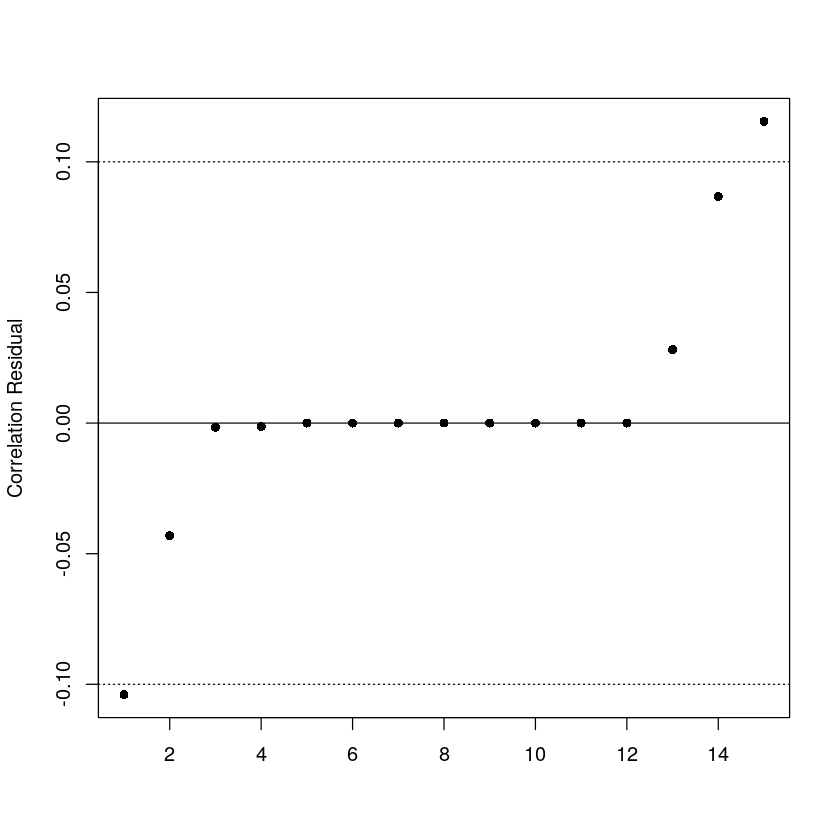

In [92]:
# Extract unique correlation residuals
fitCorResiduals <- resid(model.path.fit.fiml, type='cor')$cov
fitCorResidualsUnique <- fitCorResiduals[lower.tri(fitCorResiduals, diag=TRUE)]

summary(fitCorResidualsUnique)

plot(fitCorResidualsUnique[order(fitCorResidualsUnique)], pch=16,
     xlab='', ylab='Correlation Residual')
abline(h=c(0, -.1, .1), lty=c(1,3,3)) 

In [93]:
summary(lm(data.log$P_GDP ~ residuals_lavaan(model.path.fit)$P_GDP))
plot(data.log$P_GDP, residuals_lavaan(model.path.fit)$P_GDP)

ERROR: Error in model.frame.default(formula = data.log$P_GDP ~ residuals_lavaan(model.path.fit)$P_GDP, : variable lengths differ (found for 'residuals_lavaan(model.path.fit)$P_GDP')


In [ ]:
varTable(model.path.fit)

In [ ]:
resid(model.path.fit, type='raw')
resid(model.path.fit, type='cor')
resid(model.path.fit, type='normalized')
